<a href="https://colab.research.google.com/github/julitostrong/PROGET-PYTHON_skearn/blob/main/formdeep01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reconnaissance d'√©criture manuscrite √† l'aide de CNN**

**Les CNN :**

Les r√©seaux de neurones convolutionnels (Convolutional Neural Networks, CNN) sont un type de r√©seaux de neurones utilis√©s couramment en apprentissage automatique pour la reconnaissance d'images et de patterns. Ils sont particuli√®rement efficaces pour traiter des donn√©es qui ont une structure spatiale, comme les images et les s√©ries temporelles.

Les CNN sont construits √† partir de couches de neurones qui utilisent des filtres de convolution pour d√©tecter des motifs dans les donn√©es d'entr√©e. Ces filtres sont des matrices de poids qui sont appliqu√©es sur les donn√©es d'entr√©e en effectuant une op√©ration de convolution, ce qui permet de d√©tecter des caract√©ristiques locales dans les donn√©es.

Les CNN comprennent souvent plusieurs couches de convolution et de pooling qui permettent de capturer des motifs de diff√©rentes tailles et de diff√©rents niveaux de d√©tail. Les couches de convolution utilisent souvent des fonctions d'activation ReLU (Rectified Linear Unit) pour limiter la sortie de chaque neurone √† un nombre positif en "coupant" les r√©sultats n√©gatifs √† z√©ro. Les couches de pooling r√©duisent la dimension des donn√©es en prenant le maximum de chaque sous-ensemble de donn√©es.

Apr√®s les couches de convolution et de pooling, les CNN comprennent g√©n√©ralement des couches de neurones pleinement connect√©es qui prennent en entr√©e les caract√©ristiques d√©tect√©es par les couches pr√©c√©dentes et effectuent la pr√©diction finale. Les CNN sont souvent utilis√©s pour la classification d'images, mais peuvent √©galement √™tre utilis√©s pour d'autres t√¢ches de traitement d'image, telles que la g√©n√©ration d'images, la segmentation d'image et la d√©tection d'objets.

Dans cet exemple, nous utilisons la base de donn√©es de la biblioth√®que Keras contenant des chiffres √©crits √† la main.

### Exemple Illustration : (source medium) 

![Image](https://miro.medium.com/max/828/1*uAeANQIOQPqWZnnuH-VEyw.webp)


In [1]:
from keras.datasets import mnist

In [2]:
df = mnist.load_data()
#charge les donner dentrainnement et de test

11490434/11490434 [==============================] - 0s 0us/step


## affichage du contenue de notre base de donn√©es 

In [3]:
# creation d'une function generatrice de nombre d'indice aleatoire pour le subploting
import random

def generate(n : int, lenOfElement : int) -> list:
    elementsListe = []
    for i in range(n):
        elementsListe.append(random.randint(0,lenOfElement))
    return elementsListe

In [4]:
print(generate(12,168))

[26, 5, 143, 129, 155, 69, 115, 58, 158, 158, 155, 151]


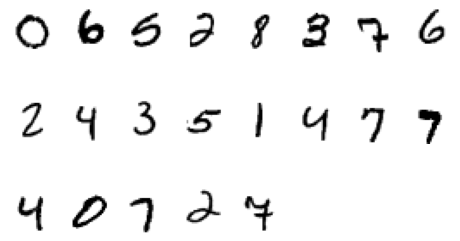

In [5]:
# execut√© plusieur fois pour que le plot change 
# ce-ci vous donnes un appercu des donn√©es 
# affichage de quelque pictorane des ecrits manuscrit ...

import matplotlib.pyplot as plt

# creation d'un axe de multi ploting on decide d'affich√© 20 image aleatoire:
def plotting(subplotting : int, lenListe : int,grilleAffiche : list ) -> None:
    nplots = subplotting
    liste = generate(subplotting,lenListe)
    fig = plt.figure(figsize=(8,8))
    for j in range(nplots):
        plt.subplot(grilleAffiche[0],grilleAffiche[1],j+1)
        plt.imshow(df[0][0][liste[j]], cmap='binary')
        plt.axis('off')
    plt.show()

if __name__ =="__main__":
    try:
        plotting(21,60000,[5,8])
    except ValueError:
        print("AJUSTER LA GRILLE")


#**Mise en place du mod√®le**

## **Importation des librairies**

## **CONTRUCTION DU TRAINTSET ET TESTSET**

#### mnist contient 70000 images avec train √† 90% et un test √† 10% par defaut

In [7]:
import numpy as np
np.random.seed(1234)
(X_train, y_train), (X_test, y_test) = mnist.load_data() # CHARGEMENT DES DONNEES DEPUIS MNIST
#elle contien 70000 images de 28px/28px

#60000 images pour le train et 10000 pour le test 
print(X_train.shape, y_train.shape) # taille du train 

(60000, 28, 28) (60000,)


In [12]:
print(X_test.shape, y_test.shape) # taille du test

(10000, 28, 28, 1) (10000,)


#### Pr√©traitement de donn√©es au format  (n_samples, hauteur, largeur, n_canaux)
Canal:
- 3 = RGB
- 1 = Noir & Blanc


In [13]:
# transposition  
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

 la m√©thode **reshape** de NumPy est utilis√©e pour modifier la forme des tableaux X_train et X_test. La m√©thode reshape prend en entr√©e un tuple indiquant la nouvelle forme souhait√©e pour le tableau et retourne un nouveau tableau avec cette forme, sans modifier l'original.

Dans le cas de X_train, le tuple (X_train.shape[0], 28, 28, 1) indique que le nouveau tableau aura le m√™me nombre de lignes que l'original (X_train.shape[0]), mais que chaque ligne sera transform√©e en une matrice de 28x28 pixels avec un seul canal de couleur (1).

De cette fa√ßon, le tableau X_train est modifi√© pour avoir la forme (n_samples, 28, 28, 1), o√π n_samples est le nombre de lignes dans le tableau original.

Le m√™me processus est effectu√© sur le tableau X_test, qui est modifi√© pour avoir la m√™me forme que X_train.

Cette modification de la forme des donn√©es est souvent n√©cessaire lorsque vous utilisez des r√©seaux de neurones convolutionnels (CNN) pour traiter des images, car les CNN attendent souvent que les donn√©es d'entr√©e soient organis√©es sous forme de tableaux de dimensions **(n_samples, hauteur, largeur, n_canaux)**.

In [14]:
import keras 
import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

- **keras** est une biblioth√®que de r√©seaux de neurones con√ßue pour √™tre facile √† utiliser et √† √©tendre. Elle est bas√©e sur TensorFlow, une biblioth√®que de calcul num√©rique en deux dimensions pour Python.

- **numpy** est une biblioth√®que de calcul scientifique qui fournit des fonctionnalit√©s avanc√©es pour travailler avec des tableaux et des matrices de nombres.

- **pandas** est une biblioth√®que de manipulation de donn√©es qui permet de manipuler et d'analyser facilement des donn√©es structur√©es sous forme de tableaux.

- **tensorflow** est une biblioth√®que de calcul en deux dimensions pour Python qui permet de d√©velopper et de d√©ployer des mod√®les de deep learning de mani√®re efficace.

- **mnist** est un jeu de donn√©es de chiffres manuscrits qui est souvent utilis√© pour tester et √©valuer les mod√®les de reconnaissance de caract√®res.

- **Sequential** est une classe de Keras qui permet de cr√©er un mod√®le de r√©seau de neurones s√©quentiel, c'est-√†-dire un mod√®le form√© de couches de neurones qui s'ex√©cutent les unes √† la suite des autres.

- **Dense** est une couche de neurones pleinement connect√©e de Keras qui permet de cr√©er une couche de r√©seau de neurones dans lequel tous les neurones sont connect√©s aux neurones de la couche pr√©c√©dente et suivante.

- **Dropout** est une couche de Keras qui permet de r√©gulariser un mod√®le en "√©teignant" al√©atoirement certains neurones pendant l'entra√Ænement. Cela peut aider √† pr√©venir le surapprentissage et √† am√©liorer la g√©n√©ralisation du mod√®le.

- **Flatten** est une couche de Keras qui permet de transformer un tenseur de donn√©es de haute dimension en un tenseur √† une dimension, ce qui est n√©cessaire pour utiliser certaines couches de r√©seaux de neurones qui ne peuvent travailler qu'avec des donn√©es √† une dimension.

- **Conv2D** est une couche de convolution 2D de Keras qui permet de cr√©er une couche de r√©seau de neurones de convolution qui peut d√©tecter des motifs dans des donn√©es d'image ou de signal.

- **MaxPool2D** est une couche de max pooling 2D de Keras qui permet de r√©duire la dimension des donn√©es en prenant le maximum de chaque sous-ensemble de donn√©es. Cela peut √™tre utile pour r√©duire la complexit√© du mod√®le et am√©liorer les performances.

In [15]:
# taille entrer du reseau
input_shape = (28, 28, 1)

In [16]:
# [0,...,9] = 10 classe
num_classes= 10

In [17]:
# passe des matrice en un format categorique 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

**tf.keras.utils.to_categorical()**
permet de convertir des √©tiquettes de classe en vecteurs de cat√©gories.

Elle prend en entr√©e une liste ou un tableau d'√©tiquettes de classe sous forme de nombres entiers (par exemple [0, 1, 2, 3]) et renvoie un tableau de vecteurs de cat√©gories correspondants (par exemple [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]).

In [18]:
# retypage 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [19]:

model = Sequential()
# extracteur
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',input_shape=input_shape))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPool2D())
model.add(Flatten())

# Reseau de neurones
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

en bref :
Ce code en Python d√©finit un mod√®le de r√©seau de neurones utilisant le framework de deep learning **Keras**. Le mod√®le est de type **"s√©quentiel"**, c'est-√†-dire qu'il est form√© de couches de neurones qui s'ex√©cutent les unes √† la suite des autres.

Le mod√®le commence par une couche de convolution 2D (Conv2D) avec 32 filtres, une taille de noyau de 3 et une fonction d'activation ReLU (Rectified Linear Unit). La couche de convolution permet de d√©tecter des motifs dans les donn√©es d'entr√©e (ici des images). La fonction d'activation **ReLU** permet de limiter la sortie de chaque neurone √† un nombre positif en "coupant" les r√©sultats n√©gatifs √† z√©ro. La couche suivante est une couche de max pooling 2D (MaxPool2D) qui r√©duit la dimension des donn√©es en prenant le maximum de chaque sous-ensemble de donn√©es.

Le mod√®le comprend √©galement deux autres couches de convolution 2D et de max pooling 2D similaires, ainsi qu'une couche de aplatissement (Flatten) qui transforme les donn√©es en un tenseur √† une dimension. Le mod√®le comprend √©galement deux couches de neurones pleinement connect√©es (Dense) avec 256 et 10 neurones respectivement, ainsi qu'une couche de dropout (Dropout) qui "√©teint" al√©atoirement certains neurones pendant l'entra√Ænement afin de r√©gulariser le mod√®le et d'am√©liorer ses performances. La derni√®re couche est une couche de sortie avec 10 neurones et une fonction d'activation softmax qui permet de fournir des pr√©dictions sous forme de vecteurs de probabilit√©s pour chaque classe de sortie possible.

In [21]:
# parametrage du modele
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

La m√©thode **compile** de l'objet **model** permet de configurer le mod√®le de r√©seau de neurones avant de le lancer pour l'entra√Ænement. Cette m√©thode prend en entr√©e plusieurs arguments qui permettent de sp√©cifier la fonction de perte √† utiliser **(loss)**, **l'optimiseur** √† utiliser et les **m√©triques** √† suivre pendant l'entra√Ænement et l'√©valuation du mod√®le.
Dans notre cas :

Dans cet exemple, la fonction de perte **categorical_crossentropy** est utilis√©e pour mesurer l'erreur du mod√®le lors de la pr√©diction des classes de sortie (ce qui est souvent le cas lorsque vous travaillez avec des donn√©es de classification multi-classe). 

L'optimiseur **adam** est utilis√© pour mettre √† jour les poids du mod√®le pendant l'entra√Ænement. 

Les m√©triques de **accuracy** sont utilis√©es pour suivre la pr√©cision du mod√®le pendant l'entra√Ænement et l'√©valuation.


In [22]:
# execution 
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=20,
    verbose=1,
) 

Epoch 1/20
469/469 [==============================] - 107s 226ms/step - loss: 0.2266 - accuracy: 0.9293 - val_loss: 0.0468 - val_accuracy: 0.9836
Epoch 2/20
469/469 [==============================] - 112s 238ms/step - loss: 0.0568 - accuracy: 0.9830 - val_loss: 0.0319 - val_accuracy: 0.9888
Epoch 3/20
469/469 [==============================] - 108s 231ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0280 - val_accuracy: 0.9909
Epoch 4/20
469/469 [==============================] - 111s 236ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0264 - val_accuracy: 0.9919
Epoch 5/20
469/469 [==============================] - 110s 234ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0268 - val_accuracy: 0.9918
Epoch 6/20
469/469 [==============================] - 112s 238ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0236 - val_accuracy: 0.9929
Epoch 7/20
469/469 [==============================] - 110s 234ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0311 -

KeyboardInterrupt: ignored

la m√©thode **fit** de l'objet **model** execute l'apprentissage.La m√©thode evaluate pour √©valuer le mod√®le sur des donn√©es de test et la m√©thode predict pour faire des pr√©dictions sur de nouvelles donn√©es.

# Performance du models

In [ ]:
# affichage des score 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#accuracy performance du model ,lost perte 

Test loss: 0.03728451952338219
Test accuracy: 0.9912999868392944


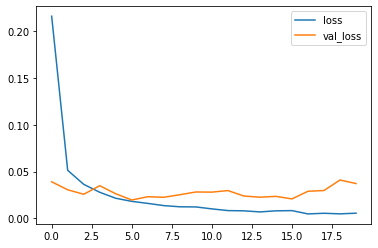

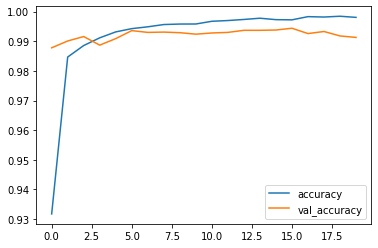

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

l'observation des grahes montre l'absence d'overfitting üòÅ

# Fonction pour le Test

In [ ]:
# definir un intervale de valeur a selection√© dans notre Testset
def intervaleTest(ends : int) -> tuple:
    chiffre = np.squeeze(X_test[:ends])
    prediction = model.predict(X_test[:ends])
    yield (prediction,chiffre)

In [ ]:
def Test(nombre : int = 1) -> None:
    for el in intervaleTest(nombre):
        for i in range(len(el[0])):
            valeur_predite = np.argmax(el[0][i])
            vraie_valeur = np.argmax(y_test[i])
            print(f'valeur predite : {valeur_predite}')
            print(f'vraie valeur : {vraie_valeur}')
            plt.imshow(el[1][i],cmap='binary')
            plt.show()
 

# **Test du mod√®le (prediction)** 

1/1 [==============================] - 0s 106ms/step
valeur predite : 7
vraie valeur : 7


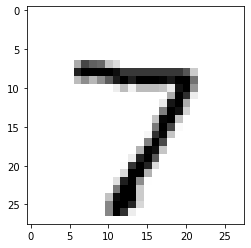

valeur predite : 2
vraie valeur : 2


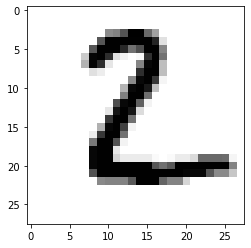

valeur predite : 1
vraie valeur : 1


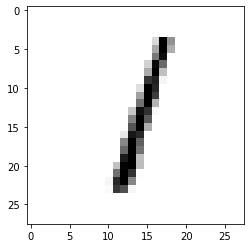

valeur predite : 0
vraie valeur : 0


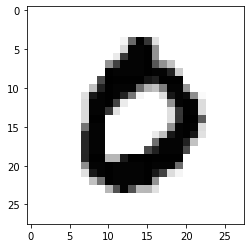

valeur predite : 4
vraie valeur : 4


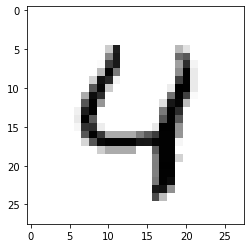

valeur predite : 1
vraie valeur : 1


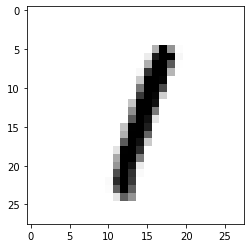

valeur predite : 4
vraie valeur : 4


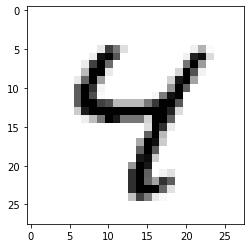

valeur predite : 9
vraie valeur : 9


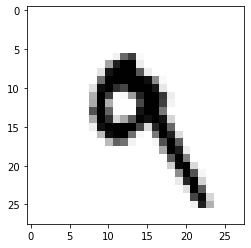

valeur predite : 5
vraie valeur : 5


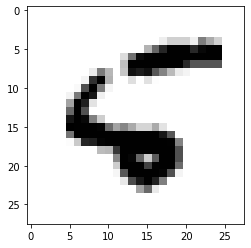

valeur predite : 9
vraie valeur : 9


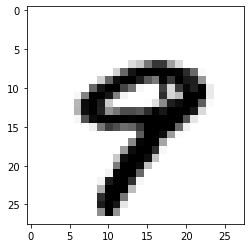

valeur predite : 0
vraie valeur : 0


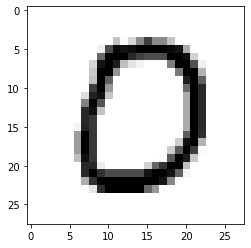

valeur predite : 6
vraie valeur : 6


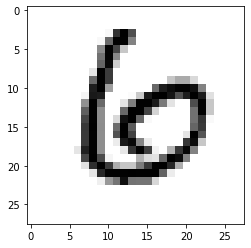

In [ ]:
# on teste avec les 12 premi√®res valeurs de nos donn√©es de test vous pouvez l'√©tendre
Test(12)